# MS Census Tract Data Analysis

In [38]:
! pip install xlrd

In [39]:
! pip install openpyxl

In [40]:
! pip install -r requirements.txt
# I made a copy of the requirements.txt and moved it into the main

In [41]:
! pip install -r requirements-2.txt

In [10]:
import numpy as np
import pandas as pd
import math
import base64
import collections
import seaborn as sns
import matplotlib.pyplot as plt

### Loading in Datasets

In [11]:
# Load datasets

# Desert census data
df = pd.read_excel('MS_Food_Desert19.xlsx', # deserts
                    sheet_name='Only_MS_Data')
df1 = pd.read_excel('Food Swamp File_Census Tracts_mRFEI.xls', #mrfei
                    sheet_name='MS Data')
df2 = pd.read_excel('Food Swamps_County Classification.xls',
                   sheet_name='Analysis', header=8)
obese = pd.read_excel('2016 County Health Rankings Mississippi Data.xls', #obesity 
                    sheet_name='Ranked Measure Data',
                    header=1
                   ) 

#### Renaming

In [12]:
df_des = df.rename(columns={"https://www.americashealthrankings.org/explore/annual/measure/Obesity/state/MS": 'tract',
                  'State':'state',
                  'County':'county',
                  'LILATracts_1And10':'lila',
                  'MedianFamilyIncome':'med_fam_inc'
                  }) #tract and county

df1 = df1.rename(columns={'Census Tract':'tract'}) #mrfei - tract
df2 = df2.rename(columns={'FIPS':'fips', #excel swamps + obesity - fips, county
                         'County':'county',
                         'Traditional RFEI':'trad_rfei',
                         'Food Swamp (Traditional REFI)':'trad_swamp',
                         'Expanded RFEI #1':'rfei1',
                         'Food Swamp':'swamp1',
                         'Expanded RFEI #2':'rfei2',
                         'Food Swamp.1':'swamp2'})
obese = obese.rename(columns={'FIPS':'fips',
                         'County':'county'})

In [13]:
df_des['county'] = df_des['county'].str.replace(' County',"")

In [14]:
#df_des['lila'].isnull().values.any()

#### Keep values for food swamp calculations

In [15]:
df2 = df2[['fips','county','Obesity Rate','Fast Food', 'Convenience Stores', 'Grocery Stores',
           'Supercenters & Club Stores', 'Specialized Food Stores', "Farmers' Markets (2018)",
           'trad_rfei','trad_swamp','rfei1','swamp1','rfei2','swamp2']]
#Numerator: CONVS16; FFR16
#Denominator: GROC16, SUPERC16, SPECS16, FMRKT18
df2['trad_ratio'] = (df2['Convenience Stores'] + df2['Fast Food']) / (df2['Grocery Stores'] )
df2['ratio1'] = (df2['Convenience Stores'] + df2['Fast Food'] + df2['Supercenters & Club Stores'])/(df2['Specialized Food Stores']+
                                                                                                    df2["Farmers' Markets (2018)"]+
                                                                                                    df2['Grocery Stores'])

df2['ratio2'] = (df2['Convenience Stores'] + df2['Fast Food']) / (df2['Grocery Stores'] + df2['Supercenters & Club Stores'] +
                                                        df2['Specialized Food Stores'] + df2["Farmers' Markets (2018)"])


In [16]:
threshold = ((df2[df2['ratio2']>4.02].count().iloc[1]) / 82)
print('The percent of counties that were found to be food swamps is',round(threshold*100,2),'%')

The percent of counties that were found to be food swamps is 75.61 %


In [17]:
df2[df2['ratio2']>4.02].count().iloc[1]

62

#### Keep variables for deserts

In [18]:
# We have to decide which variables we want to keep for analysis
df_des = df_des[['tract',
        'state',
        'county',
        'Pop2010',
        'lila',
        'LowIncomeTracts',
        'PovertyRate',
        'med_fam_inc',
        'lapop1',
        'lalowi1',
        'lawhite1',
        'lablack1',
        'laasian1',
        'lanhopi1',
        'laaian1',
        'laomultir1',
        'lahisp1',
        'lahunv1',
        'lasnap1',
        'lakids1',
        'laseniors1',
        'lapop10',
        'lakids10',
        'laseniors10',
        'lawhite10',
        'lablack10',
        'laasian10',
        'lanhopi10',
        'laaian10',
        'laomultir10',
        'lahisp10',
        'lahunv10',
        'lasnap10',
        'TractKids',
        'TractSeniors',
        'TractWhite',
        'TractBlack',
        'TractAsian',
        'TractNHOPI',
        'TractAIAN',
        'TractOMultir',
        'TractHispanic',
        'TractHUNV',
        'TractSNAP',
        'TractLOWI'
       ]]
df_des
#df.columns

,tract,state,county,Pop2010,lila,LowIncomeTracts,PovertyRate,med_fam_inc,lapop1,lalowi1,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,TractLOWI
0,28001000100,Mississippi,Adams,7602,0,1,34.135842,42817.0,7091.186607,3240.964009,...,4741,2129,36,2,46,648,1896,85,366,3140
1,28001000200,Mississippi,Adams,4126,0,1,30.415114,32746.0,3985.522586,2224.778955,...,664,3410,0,1,7,44,37,99,310,2176
2,28001000300,Mississippi,Adams,2087,1,1,43.091207,24643.0,1773.620081,1257.956765,...,78,1995,1,0,6,7,18,182,295,1238
3,28001000400,Mississippi,Adams,3208,1,1,55.022593,16346.0,604.395368,520.556232,...,64,3090,4,0,9,41,16,219,378,2209
4,28001000500,Mississippi,Adams,3607,0,1,44.039735,27983.0,1666.095832,1106.185502,...,1513,1985,14,0,16,79,66,94,309,2517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,28163950200,Mississippi,Yazoo,3208,0,1,31.825578,36678.0,337.898136,149.426585,...,1161,1984,33,0,3,27,25,104,388,1937
655,28163950300,Mississippi,Yazoo,4612,1,1,46.800083,25799.0,1046.626978,754.580174,...,574,3984,23,0,9,22,26,348,867,3255
656,28163950400,Mississippi,Yazoo,1833,0,0,14.026602,59856.0,1832.999993,694.949607,...,1399,423,0,0,0,11,22,20,109,618
657,28163950500,Mississippi,Yazoo,4563,1,1,50.711966,23134.0,4261.258878,3495.841911,...,410,4094,7,0,8,44,44,159,506,3245


#### Add desert classification column

In [19]:
# Adding indicator column to desert df
def classify_desert(row):
    if row['lila']==0:
        return False
    elif row['lila']==1:
        return 'Desert'
    
df_des['fd_status'] = df_des.apply(lambda row: classify_desert(row), axis=1)
df_des.head()
df_des.groupby('fd_status').size()

fd_status
False     451
Desert    208
dtype: int64

In [20]:
df1 = df1.sort_values(by='mrfei')

### Defining Food Swamp Parameters
We can calculate the numeric threshold of MRFEI for food swamps based on the percentage of observed food swamp prevalence found with county information. We know 75.61% of counties in MS were found to be food swamps, so we can apply this number to our total of 605 tracts to reach (605 x .7561) ~457 tracts.

In [21]:
swamps = df1.sort_values(by='mrfei').iloc[:480]
swamps.tail(40)

,state,tract,mrfei
441,MS,28109950402,13.333333
442,MS,28121020202,13.333333
443,MS,28135950100,13.333333
439,MS,28059040700,13.333333
444,MS,28039950100,13.636364
445,MS,28067950500,13.636364
446,MS,28123020500,13.636364
447,MS,28151000700,13.636364
448,MS,28107950600,13.953488
454,MS,28043950300,14.285714


However, this leaves us in the "middle" of the 14.285714 mRFEI score, with some counties being included and others not despite their identical score. Instead, it is better to exclude these tracts, and set the numeric threshold for food swamps as under a score of 14.

In [22]:
#Instead, use the 14 MRFEI cutoff
swamps = df1[df1['mrfei']<=14]
actual_swamp_count = swamps.count()[1]
print('Tracts considered to be food swamps make up', round((actual_swamp_count/605)*100,2),'% of all tracts in MS.')
#threshold

Tracts considered to be food swamps make up 74.21 % of all tracts in MS.


In [23]:
actual_swamp_count

449

This threshold indicates 449 census tracts in MS are considered food swamps.

### Merging the datasets into one dataframe

In [24]:
main = pd.merge(df1, df_des, how='inner', on='tract')
main = main.drop(['state_x', 'state_y',], axis=1)

In [25]:
main['lila'].isnull().values.any()

False

In [26]:
def swamp_check(x):
    if x['mrfei']<=14:
        return 'Swamp'
    else:
        return False
        
main['swamp_status'] = main.apply(lambda x: swamp_check(x), axis=1)
main[main['swamp_status']=='Swamp'].count()['tract'] 
#main.tail(16)

385

In [27]:
def classify(row):
    if row['fd_status']==False:
        if row['swamp_status']=='Swamp':
            return 'Swamp'
        else:
            return 'Neither'
    elif row['fd_status']=='Desert':
        if row['swamp_status']=='Swamp':
            return 'Both'
        else:
            return 'Desert'
main['status'] = main.apply(lambda row: classify(row), axis=1)
main.groupby('status').count()

,tract,mrfei,county,Pop2010,lila,LowIncomeTracts,PovertyRate,med_fam_inc,lapop1,lalowi1,...,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,TractLOWI,fd_status,swamp_status
status,,,,,,,,,,,,,,,,,,,,,
Both,143,143,143,143,143,143,143,142,143,143,...,143,143,143,143,143,143,143,143,143,143
Desert,36,34,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
Neither,102,100,102,102,102,102,102,102,98,98,...,102,102,102,102,102,102,102,102,102,102
Swamp,242,242,242,242,242,242,242,241,231,231,...,242,242,242,242,242,242,242,242,242,242


In [28]:
def assign_number(row):
    if row['status']=='Neither':
        return 1
    elif row['status']=='Desert':
        return 2
    elif row['status']=='Swamp':
        return 3
    elif row['status']=='Both':
        return 4
main['class'] = main.apply(lambda x: assign_number(x), axis=1)
main

,tract,mrfei,county,Pop2010,lila,LowIncomeTracts,PovertyRate,med_fam_inc,lapop1,lalowi1,...,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,TractLOWI,fd_status,swamp_status,status,class
0,28001000300,0.0,Adams,2087,1,1,43.091207,24643.0,1773.620081,1257.956765,...,6,7,18,182,295,1238,Desert,Swamp,Both,4
1,28089030101,0.0,Madison,7285,0,0,4.184704,104225.0,5158.072415,361.232772,...,12,79,95,44,38,606,False,Swamp,Swamp,3
2,28089030201,0.0,Madison,7667,0,0,5.225601,122569.0,7666.999983,609.848568,...,17,65,72,0,0,734,False,Swamp,Swamp,3
3,28089030204,0.0,Madison,3853,0,0,2.327366,131161.0,2222.533903,158.306292,...,3,51,29,17,0,279,False,Swamp,Swamp,3
4,28089030205,0.0,Madison,2189,0,0,1.767478,159531.0,1171.076253,148.877684,...,8,37,30,37,0,266,False,Swamp,Swamp,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,28121021003,50.0,Rankin,5073,0,0,11.200471,66207.0,5052.852787,1618.511932,...,10,65,62,20,128,1641,False,False,Neither,1
519,28025950200,NaN,Clay,2537,1,1,20.640270,44609.0,2536.999997,1117.505792,...,3,11,21,97,88,1019,Desert,False,Desert,2
520,28037950200,NaN,Franklin,2725,1,1,20.178282,55299.0,2724.999983,1472.152560,...,1,14,9,20,133,1333,Desert,False,Desert,2
521,28045030400,NaN,Hancock,2313,0,0,6.700791,60938.0,2312.999974,588.927226,...,9,67,51,3,53,458,False,False,Neither,1


Ther are 523 tracts with both food desert and swamp information that will be used for deeper statistical analysis.

In [29]:
obese = obese[['fips','county','% Obese',]]

In [30]:
main = pd.merge(main, obese, how='inner', on='county')
main = main.rename(columns={'% Obese':'perObese'})

In [31]:
main

,tract,mrfei,county,Pop2010,lila,LowIncomeTracts,PovertyRate,med_fam_inc,lapop1,lalowi1,...,TractHispanic,TractHUNV,TractSNAP,TractLOWI,fd_status,swamp_status,status,class,fips,perObese
0,28001000300,0.000000,Adams,2087,1,1,43.091207,24643.0,1773.620081,1257.956765,...,18,182,295,1238,Desert,Swamp,Both,4,28001.0,36.4
1,28001000200,9.090909,Adams,4126,0,1,30.415114,32746.0,3985.522586,2224.778955,...,37,99,310,2176,False,Swamp,Swamp,3,28001.0,36.4
2,28001000400,15.000000,Adams,3208,1,1,55.022593,16346.0,604.395368,520.556232,...,16,219,378,2209,Desert,False,Desert,2,28001.0,36.4
3,28001000100,15.789474,Adams,7602,0,1,34.135842,42817.0,7091.186607,3240.964009,...,1896,85,366,3140,False,False,Neither,1,28001.0,36.4
4,28001000800,17.647059,Adams,3456,1,1,30.890569,45855.0,2591.487281,1008.191619,...,13,105,315,1379,Desert,False,Desert,2,28001.0,36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,28153950100,40.000000,Wayne,5438,0,1,22.487346,62179.0,5157.986971,2707.362981,...,48,117,328,2803,False,False,Neither,1,28153.0,37.7
519,28125950200,20.000000,Sharkey,2019,0,1,24.189647,35966.0,42.287006,33.894165,...,10,125,309,1537,False,False,Neither,1,28125.0,40.5
520,28125950100,20.000000,Sharkey,2897,0,1,27.455167,43571.0,2697.931191,1750.662003,...,29,131,322,1490,False,False,Neither,1,28125.0,40.5
521,28065950100,21.428571,Jefferson Davis,5601,0,1,33.914849,25739.0,4412.186447,2698.272020,...,25,242,441,2938,False,False,Neither,1,28065.0,38.4


#### Add 'total' column

In [32]:
main['total'] = main[['TractWhite','TractBlack','TractAsian','TractNHOPI','TractAIAN','TractOMultir','TractHispanic']].sum(axis=1)

In [33]:
# population sum table
main.groupby('status')[['TractWhite','TractBlack','TractAsian','TractNHOPI','TractAIAN','TractOMultir','TractHispanic','total']].sum()

,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,total
status,,,,,,,,
Both,225130,363422,3471,244,1844,14785,17128,626024
Desert,70843,74362,533,52,310,2986,3065,152151
Neither,307352,143482,3436,126,3195,9288,10958,477837
Swamp,735297,362859,10893,486,4411,26676,29772,1170394


#### Adding percentage columns for race

In [34]:
main['perTotalAIAN'] = main.apply((lambda x: x['TractAIAN']/x['total']*100), axis=1)
main['perTotalAsian'] = main.apply((lambda x: x['TractAsian']/x['total']*100), axis=1)
main['perTotalWhite'] = main.apply((lambda x: x['TractWhite']/x['total']*100), axis=1)
main['perTotalBlack'] = main.apply((lambda x: x['TractBlack']/x['total']*100), axis=1)
main['perTotalHispanic'] = main.apply((lambda x: x['TractHispanic']/x['total']*100), axis=1)
main['perTotalNHOPI'] = main.apply((lambda x: x['TractNHOPI']/x['total']*100), axis=1)
main['perTotalOMultir'] = main.apply((lambda x: x['TractOMultir']/x['total']*100), axis=1)

In [35]:
main['total'].isnull().values.any() #checking values

False

In [36]:
# percent avg table
main.groupby('status')[['perTotalWhite','perTotalBlack','perTotalAsian','perTotalNHOPI','perTotalAIAN','perTotalOMultir','perTotalHispanic']].mean()

,perTotalWhite,perTotalBlack,perTotalAsian,perTotalNHOPI,perTotalAIAN,perTotalOMultir,perTotalHispanic
status,,,,,,,
Both,33.310573,60.896192,0.730942,0.041188,0.272516,2.227953,2.520635
Desert,42.830302,52.848729,0.350143,0.044962,0.203862,1.845500,1.876501
Neither,59.968603,34.901919,0.654415,0.021135,0.564648,1.848348,2.040931
Swamp,58.624233,35.342203,0.863034,0.046323,0.347992,2.254291,2.521925


In [42]:
main.groupby(["status"])["med_fam_inc"].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Both,142.0,38336.654930,12213.437309,14539.0,29125.00,37682.5,46160.00,78517.0
Desert,36.0,41737.583333,10988.629158,16346.0,35743.75,43598.5,47041.00,68906.0
Neither,102.0,55248.098039,17841.313819,23967.0,45028.50,52298.5,64569.75,149423.0
Swamp,241.0,57110.697095,22596.900585,20833.0,44063.00,53068.0,65507.00,178264.0


In [66]:
use_me = main['med_fam_inc'].to_list()

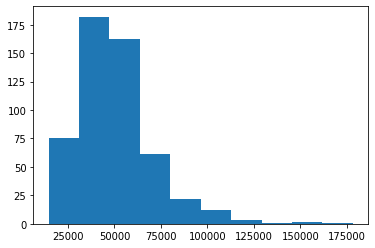

[ 75. 182. 162.  61.  22.  12.   3.   1.   2.   1.]


In [73]:
(n, bins, patches) = plt.hist(main['med_fam_inc'], bins=10, label='hst')

plt.show()

print(n)

### Data Visualizations

In [ ]:
#sns.pairplot(main, dropna=True)

#### Starting off with Median Famiy Income

In [ ]:
# Desert
income_hist = main.hist(column='med_fam_inc', by='status',
         xlabelsize=1,
         xrot=45,
         figsize=[7,10])

In [75]:
deserts = main[main['status']=='Desert']
swamp_ = main[main['status']=='Swamp']
neither = main[main['status']=='Neither']
both = main[main['status']=='Both']

[32. 83. 74. 27. 11.  9.  2.  1.  1.  1.]


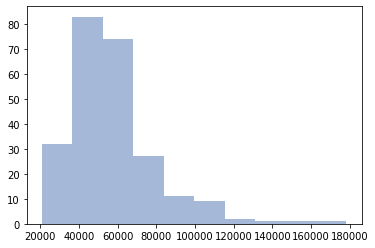

In [80]:
x = swamp_.med_fam_inc
(n, bins, patches) = plt.hist(x, alpha=0.5, label='swamp')
print(n)

[ 1.  3.  3.  5.  4. 13.  2.  3.  0.  2.]


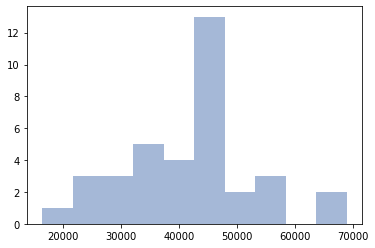

In [81]:
y = deserts.med_fam_inc

(o, bins, patches)=plt.hist(y, alpha=0.5, label='desert')
print(o)

[ 7. 25. 23. 24. 30. 19.  6.  4.  2.  2.]


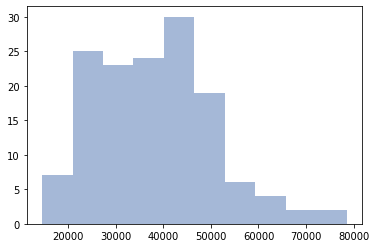

In [82]:
z = both.med_fam_inc

(p, bins, patches) = plt.hist(z, alpha=0.5, label='both')

print(p)

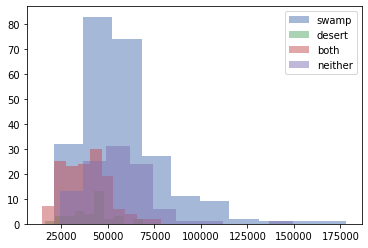

1       32746.0
9      104225.0
10     122569.0
11     131161.0
12     159531.0
         ...   
489     33727.0
490     42792.0
495     47348.0
496     54301.0
502     46949.0
Name: med_fam_inc, Length: 242, dtype: float64


In [77]:
# stacked histogram
x = swamp_.med_fam_inc
y = deserts.med_fam_inc
z = both.med_fam_inc
q = neither.med_fam_inc

plt.hist(x, alpha=0.5, label='swamp')
plt.hist(y, alpha=0.5, label='desert')
plt.hist(z, alpha=0.5, label='both')
plt.hist(q, alpha=0.5, label='neither')

plt.legend(loc='upper right')
plt.style.use('seaborn-deep')


plt.show()


[13. 25. 31. 24.  6.  1.  1.  0.  0.  1.]


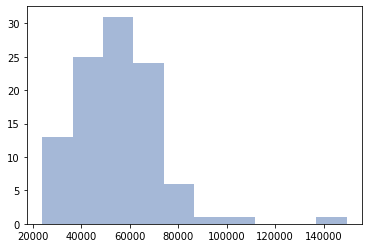

In [83]:
q = neither.med_fam_inc

(s, bins, patches)=plt.hist(q, alpha=0.5, label='neither')

print(s)

In [ ]:
# single histograms
deserts.hist(column='med_fam_inc')

In [ ]:
swamp_.hist(column='med_fam_inc')

In [ ]:
neither.hist(column='med_fam_inc')

In [ ]:
both.hist(column='med_fam_inc')

In [ ]:
# boxplot
ax = sns.boxplot(x='status', y='med_fam_inc', data=main,
                 showfliers=False, width=.5, linewidth = 2)
ax_ = ax.set_xlabel("Tract Classification")
_ax = ax.set_ylabel("Median Family Income (USD)")
_ = ax.set_title("Median Family Income per Classification")
x = plt.xticks(rotation=45)

#### Poverty Rates

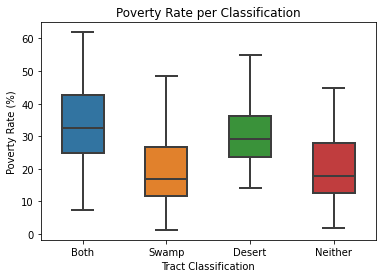

In [34]:
#boxplot
ax = sns.boxplot(x='status', y='PovertyRate', data=main,
                 showfliers=False, width=.5, linewidth = 2)
ax_ = ax.set_xlabel("Tract Classification")
_ax = ax.set_ylabel("Poverty Rate (%)")
_ = ax.set_title("Poverty Rate per Classification")
#medians = main.groupby(['status'])['PovertyRate'].median()
#vertical_offset = main['PovertyRate'].median() * 0.05
#for xtick in ax.get_xticks():
#    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#            horizontalalignment='center',size='x-small',color='w',weight='semibold')
#x = plt.xticks(rotation=45)

In [43]:
print('Poverty Rate Stats')
print(main.groupby(["status"])["PovertyRate"].describe())

Poverty Rate Stats
         count       mean        std        min        25%        50%  \
status                                                                  
Both     143.0  33.798309  12.555906   7.294658  24.746645  32.483866   
Desert    36.0  30.571535   9.090538  14.004324  23.682436  29.206076   
Neither  102.0  20.385980  10.746010   1.740159  12.668569  17.925718   
Swamp    242.0  19.984489  11.821490   1.282834  11.695427  17.015641   

               75%        max  
status                         
Both     42.643043  81.651376  
Desert   36.224912  55.022593  
Neither  27.962948  44.864148  
Swamp    26.580593  54.154930  


#### Low Income Populations

In [ ]:
#boxplot
ax = sns.boxplot(x='status', y='TractLOWI', data=main,
                 showfliers=False, width=.5, linewidth = 2)
ax_ = ax.set_xlabel("Tract Classification")
_ax = ax.set_ylabel("Low Income Population")
_ = ax.set_title("Low Income Population Distribution per Classification")
x = plt.xticks(rotation=45)

#### T-tests

In [ ]:
import pingouin
from scipy.stats import chi2_contingency

In [ ]:
# Swamp v Desert
# Keeping in mind there are 36 "desert" tracts and 242 "swamp" tracts
des_lowinc = main[main['status']=='Desert']['TractLOWI']
swamp_lowinc = main[main['status']=='Swamp']['TractLOWI']
    
pingouin.ttest(des_lowinc, swamp_lowinc)

#### Chi-squared tests

In [ ]:
a = main.status
b = main.TractLOWI

contin_table = pd.crosstab(index=a, columns=b)
chi2_contingency(contin_table)[1]

#### Racial breakdown

In [ ]:
# population bar graph
focus = main.groupby('status')[['TractWhite','TractBlack','TractAsian','TractNHOPI','TractAIAN','TractOMultir','TractHispanic']].sum()
focus.plot.barh()

In [ ]:
# percent bar graph
race = pd.pivot_table(main, values=['perTotalWhite','perTotalBlack','perTotalAsian','perTotalNHOPI','perTotalAIAN','perTotalOMultir','perTotalHispanic'],
                      index='status')
                      #aggfunc=np.sum)


values=['perTotalWhite','perTotalBlack','perTotalAsian','perTotalNHOPI','perTotalAIAN','perTotalOMultir','perTotalHispanic']
graph = race.plot.barh(y=values, legend=True)



#### Low Access: SNAP

In [ ]:
sorted(main)

In [ ]:
main['lasnap10_add'] = main.lasnap10.fillna(0)
main['lasnap1_add'] = main.lasnap10.fillna(0)
main['laseniors10_add'] = main.laseniors10.fillna(0)
main['laseniors1_add'] = main.laseniors1.fillna(0)

In [ ]:
main['lasnaptotal'] = main.lasnap1_add + main.lasnap10_add
main['laseniorstotal'] = main.laseniors1_add + main.laseniors10_add
main['perlaseniors'] = (main.laseniorstotal / main.TractSeniors)*100

In [ ]:
main

In [ ]:
main['laseniorstotal'].isnull().values.any() 

In [ ]:
ax = sns.boxplot(x='status', y='lasnap10', data=main, #hue='status',
                 showfliers=False, width=.5, linewidth = 2)
ax_ = ax.set_xlabel("Tract Classification")
_ax = ax.set_ylabel("Residents on SNAP")
_ = ax.set_title("SNAP per Classification")
x = plt.xticks(rotation=45)

### Export

In [ ]:
#main.to_csv('Census_Tract_Data_Mapping_7-30-21.csv', index=False)